### LFOs
could generate a LFO that can be applied to whatever image transformation function.
You would generate values within a certain (configurable range), and then they would be clamped down into the 
appropriate parameter.
There is probably a library for creating LFO values, would be useful for the different shapes, for example. These are wave forms. 

* frequence
* depth
* shape

So for example,  blur = cv2.blur(img, (____, ______)) Would get filled in with the lfo value squashed appropriately.
* height/width of space selection
* x/y of space selection (effecting spatial selection would effect the transformation)
* R/G/B values

We would like to be able to send it to multiple parameters simultaneously; not sure how the interface would look. Perhaps the boolean algebra would help (&&)
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.sawtooth.html
### Transformations
#### Smoothing
 https://stackoverflow.com/questions/37409811/smoothing-edges-of-a-binary-image
 blur = cv2.GaussianBlur(img,(5,5),0)
smooth = cv2.addWeighted(blur,1.5,img,-0.5,0)
 -  blur = cv2.blur(img, (100, 100))
 - 'curve straight lines' / 'smooth corners' / 'twist image'
 - project a selection elsewhere  
 https://stackoverflow.com/questions/19068085/shift-image-content-with-opencv
 https://stackoverflow.com/questions/23464495/fastest-way-to-move-image-in-opencv
### Selections
 - should be able to represent every selection as a 'mask' array of some kind
 https://stackoverflow.com/questions/36911877/cropping-circle-from-image-using-opencv-python
 
### Other Stuff
https://www.arduino.cc/en/Tutorial/Smoothing
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html

## TODO [#B] Video Synth Project with Mark
Screen capture 
How do I get video input outside of the camera?
Composite video splitter’d be nice
Composite video stream via usb
Capture the camera input stream; want to treat this equivalent to any other video stream, such as from USB from video synths

Then capture this video stream and manipulate with ffmpeg-python or moviepy
 - store a clip 
 - displace image: this is an instance of ‘picture-in-picture-witout-backdrop w/ configurable size’; actually always want ‘some backdrop’
### PinP
 - [ ] x/y knobs for size (height & width)
 - [ ] joystick for movement
 - [ ] toggle background: should be ‘transparent’ but I don’t think ‘transparent’ exists in the way I want it to
 - size is resolution
 - movement is . . . . 

### Programming Install Jupyter-notebook on rpi probably. or use mousiecam
### Make RPi ready
   - re-enable internet
   - install python packages: nltk, spacy, nltk.download, spacy.download, moviepy, ffmpeg, pygame
   - install system level: ffmpeg, etc.
### Image Rotation   clip.rotate

### Colorize ‘outline’ where white becomes dark, for example.

### Links
   - http://hannes.enjoys.it/blog/2016/03/ffmpeg-on-raspbian-raspberry-pi/
   - https://www.raspberrypi.org/forums/viewtopic.php?t=238826
   - https://www.ebay.com/p/2164324534
   - https://github.com/Apress/raspberry-pi-gpu-audio-video-prog/blob/master/OpenGLES/Hello_Square.c
   - https://febon.blogspot.com/2012/02/1.html



In [ ]:
cv2.destroyAllWindows

In [ ]:

import redis
import numpy as np
import cv2
import json
fp = '/Users/averagehat/video-synth/rpi/opencv/samples/data/opencv-logo.png'
# from matplotlib import pyplot as plt
r = redis.Redis(host='localhost', port=7777, db=0)
listener = r.pubsub()
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
img = cv2.imread(fp, cv2.IMREAD_COLOR)

x=256
y=256
r=100
# crop image as a square
img = img[y:y+r*2, x:x+r*2]
# create a mask
mask = np.full((img.shape[0], img.shape[1]), 0, dtype=np.uint8) 
# create circle mask, center, radius, fill color, size of the border
cv2.circle(mask,(r,r), r, (255,255,255),-1)
# get only the inside pixels
fg = cv2.bitwise_or(img, img, mask=mask)

mask = cv2.bitwise_not(mask)
background = np.full(img.shape, 255, dtype=np.uint8)
bk = cv2.bitwise_or(background, background, mask=mask)
final = cv2.bitwise_or(fg, bk)
#cv2.imshow('image',final)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
# plt.subplot(122),plt.imshow(final),plt.title('Final')


<ipython-input-17-2f62815060dc>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(122),plt.imshow(result),plt.title('Blurred')


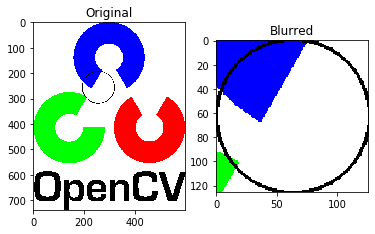

In [17]:
fp = '/Users/averagehat/video-synth/rpi/opencv/samples/data/opencv-logo.png'
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Suppose center of the circle is (a1,b1) and radius is r. Then cropping coordinates would be [ a1-r:a1+r , b1-r:b1+r ].

y=256
x=256
r=63
img = cv2.imread(fp)
cv2.circle(img,(x,y), r, (0,0,0),2)
result = img[y-r:y+r,x-r:x+r]
blur = cv2.blur(img, (100, 100))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.subplot(122),plt.imshow(result),plt.title('Blurred')
plt.show()

In [10]:
#cap = cv2.VideoCapture('moviepy/media/video_with_failing_audio.mp4')
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FOURCC,cv2.VideoWriter_fourcc('M','J','P','G'))
fourcc = cv2.VideoWriter_fourcc(*'XVID')

# out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))
RECORDING = False
VIDNUMBER = 0
GRAY = False
outname = f'output.avi'
listener.subscribe('rpi-input')
def scaleBetween(unscaledNum, minAllowed, maxAllowed, min, max):
  return (maxAllowed - minAllowed) * (unscaledNum - min) / (max - min) + minAllowed;

settings = {
    'grayscale' : False,
    'text' : None,
    'meter': 0.0,
    'mirror': False,
    'eval' : None
}        
def get_new_settings(old, raw_data):
    new = json.loads(raw_data)
    return {
        'grayscale' : (not old['grayscale']) if new.get('graytoggle') else old['grayscale'],
        'mirror' : (not old['mirror']) if new.get('flip') else old['mirror'],
        'text' : new.get('text', old['text']),
        'meter' : new.get('meter', old['meter']),
        'eval' : new.get('eval'),
        'x': new.get('x', old.get('x')),
        'y' : new.get('y', old.get('y'))
    }
# cv2.circle(img, center, radius, color, thickness=1, lineType=8, shift=0)
def apply_effects(settings, frame):
    if settings['grayscale']:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    if settings['mirror']:
        frame = cv2.flip(frame, 1)
    if settings.get('x') or settings.get('y'):
        x, y = settings.get('x', 240), settings.get('y', 240)
        scaled_x = int(scaleBetween(x, 30, 400, 0, 1050))
        scaled_y = int(scaleBetween(y, 30, 400, 0, 1050))
        print(f'scaled: {scaled_x}, {scaled_y}')
        cv2.circle(frame, (scaled_x, scaled_y), 20, (255, 0, 0), 2)
    if settings['text']:
        # frame = cv2.text(text) 
        gray = cv2.cvtColor(raw_frame, cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(
            gray,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30),
            flags=cv2.CASCADE_SCALE_IMAGE
        )
    
        # Draw a rectangle around the faces
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    if settings['eval']:
        frame = eval(settings['eval'])
    return frame
        
#def run_cam(thread_print): 
if True:
    while(cap.isOpened()):
    
        ret, raw_frame = cap.read()
        key = cv2.waitKey(1)
        if key & 0xFF == ord('q'): break
            
        if ret:
            msg = listener.get_message()
            if msg: print(msg)
            if msg and msg.get('type') == 'message':
                data, channel, msg_type = msg['data'], msg['channel'], msg['type']
                
                settings = get_new_settings(settings, data)
                print(f'New Settings: {settings}')
            frame = apply_effects(settings, raw_frame)
            cv2.imshow("Image", frame)
        else:
           print('no video')
           cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
    cap.release()

{'type': 'subscribe', 'pattern': None, 'channel': b'rpi-input', 'data': 1}
{'type': 'message', 'pattern': None, 'channel': b'rpi-input', 'data': b'{"x": 240, "y": 240}'}
New Settings: {'grayscale': False, 'mirror': False, 'text': None, 'meter': 0.0, 'eval': None, 'x': 240, 'y': 240}
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
scaled: 114, 114
sc

scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 347
scaled: 241, 3

In [ ]:
len(raw_frame[0,:])
# Recording code

            #if RECORDING:
            #    out.write(frame)

    
   #     elif key & 0xFF == ord('r'):
           # cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
            #RECORDING = not RECORDING
            #if RECORDING:
            #    VIDNUMBER += 1
            #    outname = f'output-{VIDNUMBER}.avi'
            #    out = cv2.VideoWriter(outname,fourcc, 20.0, (640,480))
            #else:
            #    out.release() 

In [12]:
len(frame)

720

In [ ]:

scaleBetween(1000, 0, 640, 0, 1050)

In [ ]:
# https://www.geeksforgeeks.org/circle-detection-using-opencv-python/
# f'= cv2.circle{("frame", center_coordinates, radius, color, thickness_in_pixels) }'
   cv2.circle('frame', (120, 50), 20, (255, 0, 0), 2)

In [ ]:
plt.show()

In [ ]:

cap.release()

In [ ]:
from nbmultitask import ThreadWithLogAndControls
task2 = ThreadWithLogAndControls(target=run_cam, name="runcam func")
task2.start()

In [ ]:
from time import sleep

# the target function will be passed a function called `thread_print`
def fn(thread_print):
    i = 1
    # be careful with loops... (in order for the stop button to work)
    while i <= 5:
        thread_print('%i...' % i)
        sleep(1.5)
        i+=1

task = ThreadWithLogAndControls(target=fn, name="do some stuff")

In [ ]:
cap.release()

In [ ]:
task2.watch()


type: One of the following: 'subscribe', 'unsubscribe', 'psubscribe', 'punsubscribe', 'message', 'pmessage'
channel: The channel [un]subscribed to or the channel a message was published to
pattern: The pattern that matched a published message's channel. Will be None in all cases except for 'pmessage' types.
data: The message data. With [un]subscribe messages, this value will be the number of channels and patterns the connection is currently subscribed to. With [p]message messages, this value will be the actual published message.

In [ ]:

settings['grayscale'] = True

In [ ]:
# https://stackoverflow.com/questions/18064914/how-to-use-opencv-python-to-blur-faces

In [ ]:
image = cv2.imread(imagepath)
result_image = image.copy()

# Specify the trained cascade classifier



# Create a cascade classifier
face_cascade.load(face_cascade_name)

#Preprocess the image
grayimg = cv2.cvtColor(image, cv2.cv.CV_BGR2GRAY)
grayimg = cv2.equalizeHist(grayimg)

#Run the classifiers
faces = face_cascade.detectMultiScale(grayimg, 1.1, 2, 0|cv2.cv.CV_HAAR_SCALE_IMAGE, (30, 30))

print "Faces detected"

if len(faces) != 0:         # If there are faces in the images
    for f in faces:         # For each face in the image
    img[startX:endX, startY:endY] = cv2.blur(img[startX:endX, startY:endY], (23, 23))

        # Get the origin co-ordinates and the length and width till where the face extends
        x, y, w, h = f

        # get the rectangle img around all the faces
        cv2.rectangle(image, (x,y), (x+w,y+h), (255,255,0), 5)
        sub_face = image[y:y+h, x:x+w]
        # apply a gaussian blur on this new recangle image
        sub_face = cv2.GaussianBlur(sub_face,(23, 23), 30)
        # merge this blurry rectangle to our final image
        result_image[y:y+sub_face.shape[0], x:x+sub_face.shape[1]] = sub_face
        face_file_name = "./face_" + str(y) + ".jpg"
        cv2.imwrite(face_file_name, sub_face)


In [ ]:

#listener.unsubscribe('rpi-input')
# def handler()
from dataclasses import dataclass

@dataclass
class RGBA:
    r: float
    g: float
    b: float
    a: float
        
from typing import Tuple
        
@dataclass
class Effects:
    gray: bool
    text: str
    rgba: RGBA